# Week 1 - Introduction

By Group XX:

-   Aleksandar Lukic - s194066
-   Paula Barho - s242926
-   Victor Gustav Harbo Rasmussen - s204475

## Part 1: Predictive policing. A case to learn from

Start by reading the article from [sciencemag.org](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens).

We will be using data from [dataSF](https://datasf.org/opendata/).

- According to the article, is predictive policing better than best practice techniques for law enforcement? The article is from 2016. Take a look around the web, does this still seem to be the case in 2024? (hint, when you evaluate the evidence consider the source)

- List and explain some of the possible issues with predictive policing according to the article.


## Part 2: Load some crime-data into your Jupyter notebook

Using pandas, we will be loading data from local files.

In [2]:
import os
import numpy as np
import pandas as pd

### Preamble for Pandas display options

These options enables the Pandas output to be fully displayed and expanded

In [3]:
# Set pandas display options to show all columns for .head command
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Auto-detect the display width
pd.set_option('display.max_colwidth', None) # Show full content of each column

### Get data from .csv

Get the datasets from the data folder in the repository:

In [4]:
# Get path of data directory
data_path = os.path.abspath(os.path.join(os.pardir, "data"))
data_path

'/Users/paulabarho/Desktop/DTU/24_25/Term_2/SocDA/repo/02806_Social_Data/data'

In [5]:
# Load data from csv files
csv_1_name = "Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250210.csv"
csv_2_name = "Police_Department_Incident_Reports__2018_to_Present_20250210.csv"
csv_1_path = os.path.join(data_path, csv_1_name)
csv_2_path = os.path.join(data_path, csv_2_name)
df_1 = pd.read_csv(csv_1_path)
df_2 = pd.read_csv(csv_2_path)

In [6]:
# Display shape of dataframes
print("df_1:", df_1.shape)
print("df_2:", df_2.shape)

df_1: (2129525, 35)
df_2: (930648, 35)


### Examine the datasets

In order to be able to concatinate the two datasets, we must ensure that they are of same diminsonality and naming- and type-conventions.

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [8]:
df_1.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,GENEVA AV / SANTOS ST,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),NaN,NaN,9.0,NaN,NaN,NaN,8.0,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,TURK ST / STJOSEPHS AV,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,0 Block of SANJUAN AV,-122.436220,37.724377,POINT (-122.43622001281001 37.7243766140428),94.0,9.0,1.0,28.0,9.0,7.0,6.0,28861.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,400 Block of 10TH ST,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),32.0,1.0,10.0,34.0,8.0,2.0,9.0,28853.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930648 entries, 0 to 930647
Data columns (total 35 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     930648 non-null  object 
 1   Incident Date                                         930648 non-null  object 
 2   Incident Time                                         930648 non-null  object 
 3   Incident Year                                         930648 non-null  int64  
 4   Incident Day of Week                                  930648 non-null  object 
 5   Report Datetime                                       930648 non-null  object 
 6   Row ID                                                930648 non-null  int64  
 7   Incident ID                                           930648 non-null  int64  
 8   Incident Number                             

In [10]:
df_2.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NaN,NaN,Mission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/02/15 03:00:00 AM,2023/02/15,03:00,2023,Wednesday,2023/03/11 04:55:00 PM,125378606372,1253786,236046123,NaN,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,NaN,NaN,Mission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/13 11:26:00 AM,2023/03/13,11:26,2023,Monday,2023/03/13 01:37:00 PM,125419506244,1254195,236046850,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Shrinking the data

The datasets are very large and contain some informations which we are currently not interested in keeping. Thus, we can extract the columns that are useful and discard the remaining.

In [11]:
# Columns to keep for df_1
columns_to_keep_1 = [
    'Date',
    'Time',
    'Category',
    'DayOfWeek',
    'X',
    'Y',
    'PdDistrict'
]

In [12]:
# Columns to keep for df_2
columns_to_keep_2 = [
    'Incident Date',
    'Incident Time',
    'Incident Category',
    'Incident Day of Week',
    'Latitude',
    'Longitude',
    'Police District'
]

In [13]:
# Extract only the columns specified for keeping
df_1 = df_1[columns_to_keep_1]
df_2 = df_2[columns_to_keep_2]

In [14]:
df_1.head()

,Date,Time,Category,DayOfWeek,X,Y,PdDistrict
0,11/22/2004,17:50,ROBBERY,Monday,-122.420084,37.708311,INGLESIDE
1,10/18/2005,20:00,VEHICLE THEFT,Tuesday,-120.500000,90.000000,PARK
2,02/15/2004,02:00,VEHICLE THEFT,Sunday,-120.500000,90.000000,SOUTHERN
3,02/18/2011,05:27,ARSON,Friday,-122.436220,37.724377,INGLESIDE
4,11/21/2010,17:00,ASSAULT,Sunday,-122.410541,37.770913,SOUTHERN


In [15]:
df_2.head()

,Incident Date,Incident Time,Incident Category,Incident Day of Week,Latitude,Longitude,Police District
0,2023/03/01,05:02,Larceny Theft,Wednesday,NaN,NaN,Mission
1,2023/03/13,10:59,Recovered Vehicle,Monday,NaN,NaN,Out of SF
2,2023/03/14,18:44,Recovered Vehicle,Tuesday,NaN,NaN,Out of SF
3,2023/02/15,03:00,Larceny Theft,Wednesday,NaN,NaN,Mission
4,2023/03/13,11:26,Larceny Theft,Monday,NaN,NaN,Central


### Rename the columns

Firstly, we can start by renaming the columns so that the can be joined later on:

In [16]:
df_1 = df_1.rename(columns={
    'Date': 'Date',
    'Time': 'Time',
    'Category': 'Category',
    'DayOfWeek': 'Day of Week',
    "X": "Longitude (X)",
    "Y": "Latitude (Y)",
    'PdDistrict': 'Police District'
    }
)

df_2 = df_2.rename(columns={
    'Incident Date': 'Date',
    'Incident Time': 'Time',
    'Incident Category': 'Category',
    'Incident Day of Week': 'Day of Week',
    'Longitude': 'Longitude (X)',
    'Latitude': 'Latitude (Y)',
    'Police District': 'Police District'
    }
)

### Align date and time formats

The two datasets abide by different time conventions. Thus, it is neccessary to align them with a single convention.

In [17]:
df_1.head(1)

,Date,Time,Category,Day of Week,Longitude (X),Latitude (Y),Police District
0,11/22/2004,17:50,ROBBERY,Monday,-122.420084,37.708311,INGLESIDE


In [18]:
df_2.head(1)

,Date,Time,Category,Day of Week,Latitude (Y),Longitude (X),Police District
0,2023/03/01,05:02,Larceny Theft,Wednesday,NaN,NaN,Mission


In [19]:
# Parsing the date and time
df_1_time = pd.DataFrame(df_1)

# Convert "Date" column to datetime format
df_1_time["Date"] = pd.to_datetime(df_1_time["Date"], format="%m/%d/%Y")

# Create new columns from "Date"
df_1_time["Day"] = df_1_time["Date"].dt.day
df_1_time["Month"] = df_1_time["Date"].dt.strftime("%B")  # Month name
df_1_time["Year"] = df_1_time["Date"].dt.year

# Extract the hour from the "Time" column to create "TimeOfDay"
df_1_time["Hour"] = pd.to_datetime(df_1_time["Time"], format="%H:%M").dt.hour

# Drop the original "Date" and "Time" columns
df_1_time = df_1_time.drop(columns=["Date", "Time"])

In [20]:
# Parsing the date and time
df_2_time = pd.DataFrame(df_2)

# Convert "Date" column to datetime format
df_2_time["Date"] = pd.to_datetime(df_2_time["Date"], format="%Y/%m/%d")

# Create new columns from "Date"
df_2_time["Day"] = df_2_time["Date"].dt.day
df_2_time["Month"] = df_2_time["Date"].dt.strftime("%B")  # Month name
df_2_time["Year"] = df_2_time["Date"].dt.year

# Extract the hour from the "Time" column to create "TimeOfDay"
df_2_time["Hour"] = pd.to_datetime(df_2_time["Time"], format="%H:%M").dt.hour

# Drop the original "Date" and "Time" columns
df_2_time = df_2_time.drop(columns=["Date", "Time"])

In [21]:
df_1_time.head(1)

,Category,Day of Week,Longitude (X),Latitude (Y),Police District,Day,Month,Year,Hour
0,ROBBERY,Monday,-122.420084,37.708311,INGLESIDE,22,November,2004,17


In [22]:
df_2_time.head(1)

,Category,Day of Week,Latitude (Y),Longitude (X),Police District,Day,Month,Year,Hour
0,Larceny Theft,Wednesday,NaN,NaN,Mission,1,March,2023,5


In [23]:
# Override the original dataframes with the new ones
df_1 = df_1_time
df_2 = df_2_time

### Align Category and Police Department columns

The two datasets both store some lookup values for the Category and Police Department columns respectivily. However, the values are not formated the same and thus will not be seen as equal to each other. Therefore, we need to align these manually.

In [24]:
print(df_1['Category'].unique())

['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA']


In [25]:
print(df_2['Category'].unique())

['Larceny Theft' 'Recovered Vehicle' 'Lost Property' 'Drug Violation'
 'Assault' 'Malicious Mischief' 'Non-Criminal' 'Fraud' 'Warrant'
 'Other Offenses' 'Robbery' 'Case Closure' 'Stolen Property'
 'Other Miscellaneous' 'Other' 'Traffic Collision' 'Suspicious Occ'
 'Disorderly Conduct' 'Weapons Carrying Etc' 'Rape' 'Drug Offense'
 'Missing Person' 'Motor Vehicle Theft' 'Burglary' 'Fire Report' 'Arson'
 'Vandalism' 'Suicide' 'Traffic Violation Arrest' 'Courtesy Report'
 'Offences Against The Family And Children' 'Forgery And Counterfeiting'
 'Miscellaneous Investigation' 'Sex Offense' 'Weapons Offense'
 'Vehicle Misplaced' 'Suspicious' nan 'Prostitution' 'Vehicle Impounded'
 'Embezzlement' 'Gambling' 'Homicide'
 'Human Trafficking, Commercial Sex Acts' 'Liquor Laws'
 'Human Trafficking (A), Commercial Sex Acts' 'Civil Sidewalks'
 'Motor Vehicle Theft?' 'Weapons Offence'
 'Human Trafficking (B), Involuntary Servitude']


Since the second dataset is capitalized, we can convert it to uppercase.

In [26]:
df_2['Category'] = df_2['Category'].str.upper()

In [27]:
print(df_2['Category'].unique())

['LARCENY THEFT' 'RECOVERED VEHICLE' 'LOST PROPERTY' 'DRUG VIOLATION'
 'ASSAULT' 'MALICIOUS MISCHIEF' 'NON-CRIMINAL' 'FRAUD' 'WARRANT'
 'OTHER OFFENSES' 'ROBBERY' 'CASE CLOSURE' 'STOLEN PROPERTY'
 'OTHER MISCELLANEOUS' 'OTHER' 'TRAFFIC COLLISION' 'SUSPICIOUS OCC'
 'DISORDERLY CONDUCT' 'WEAPONS CARRYING ETC' 'RAPE' 'DRUG OFFENSE'
 'MISSING PERSON' 'MOTOR VEHICLE THEFT' 'BURGLARY' 'FIRE REPORT' 'ARSON'
 'VANDALISM' 'SUICIDE' 'TRAFFIC VIOLATION ARREST' 'COURTESY REPORT'
 'OFFENCES AGAINST THE FAMILY AND CHILDREN' 'FORGERY AND COUNTERFEITING'
 'MISCELLANEOUS INVESTIGATION' 'SEX OFFENSE' 'WEAPONS OFFENSE'
 'VEHICLE MISPLACED' 'SUSPICIOUS' nan 'PROSTITUTION' 'VEHICLE IMPOUNDED'
 'EMBEZZLEMENT' 'GAMBLING' 'HOMICIDE'
 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS' 'LIQUOR LAWS'
 'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS' 'CIVIL SIDEWALKS'
 'MOTOR VEHICLE THEFT?' 'WEAPONS OFFENCE'
 'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE']


In [28]:
categories = set(np.concatenate((
    df_1['Category'].unique(), 
    df_2['Category'].unique()
    ), axis=0
))

print("No. of incedent categories:", len(categories))

No. of incedent categories: 69


In [29]:
categories

{'ARSON',
 'ASSAULT',
 'BAD CHECKS',
 'BRIBERY',
 'BURGLARY',
 'CASE CLOSURE',
 'CIVIL SIDEWALKS',
 'COURTESY REPORT',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG OFFENSE',
 'DRUG VIOLATION',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FIRE REPORT',
 'FORGERY AND COUNTERFEITING',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS',
 'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE',
 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS',
 'KIDNAPPING',
 'LARCENY THEFT',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'LOST PROPERTY',
 'MALICIOUS MISCHIEF',
 'MISCELLANEOUS INVESTIGATION',
 'MISSING PERSON',
 'MOTOR VEHICLE THEFT',
 'MOTOR VEHICLE THEFT?',
 'NON-CRIMINAL',
 'OFFENCES AGAINST THE FAMILY AND CHILDREN',
 'OTHER',
 'OTHER MISCELLANEOUS',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'RAPE',
 'RECOVERED VEHICLE',
 'ROBBERY',
 'SECONDARY CODES',
 'SEX OFFENSE',
 'SEX OFFENSES,

Since the naming between the two datasets is a bit off, we adjust the names in the second dataset.

In [30]:
category_mapping = {
    'DRUG VIOLATION': 'DRUG/NARCOTIC',
    'DRUG OFFENSE': 'DRUG/NARCOTIC',
    'LARCENY THEFT': 'LARCENY/THEFT',
    'MALICIOUS MISCHIEF': 'VANDALISM',  
    'MOTOR VEHICLE THEFT': 'VEHICLE THEFT',
    'MOTOR VEHICLE THEFT?': 'VEHICLE THEFT',
    'WEAPONS CARRYING ETC': 'WEAPON LAWS',
    'WEAPONS OFFENCE': 'WEAPON LAWS',
    'WEAPONS OFFENSE': 'WEAPON LAWS',
    
    # Additional mappings for edge cases
    'TRAFFIC VIOLATION ARREST': 'DRIVING UNDER THE INFLUENCE',  # If DUI is included here 
    'SUSPICIOUS OCC': 'TRESPASS',
    'SUSPICIOUS': 'TRESPASS',
    'LIQUOR LAWS': 'DRUNKENNESS'  # If liquor law violations include public drunkenness 
}

# Replace the categories in the dataframes with the new mappings
df_2['Category'] = df_2['Category'].replace(category_mapping)

We now want to keep only the rows containing the focus crimes as defined below

In [31]:
focus_crimes = [
    'ASSAULT',
    'BURGLARY',
    'DISORDERLY CONDUCT',
    'DRIVING UNDER THE INFLUENCE',
    'DRUG/NARCOTIC',
    'DRUNKENNESS',
    'LARCENY/THEFT',
    'PROSTITUTION',
    'ROBBERY',
    'STOLEN PROPERTY',
    'TRESPASS',
    'VANDALISM',
    'VEHICLE THEFT',
    'WEAPON LAWS'
]

In [32]:
# Extract only the rows where the "Category" is in the focus_crimes list
df_1_filtered = df_1[df_1['Category'].isin(focus_crimes)]
df_2_filtered = df_2[df_2['Category'].isin(focus_crimes)]

In [33]:
print("df_1:", df_1.shape)
print("df_2:", df_2.shape)
print("df_1_filtered:", df_1_filtered.shape)
print("df_2_filtered:", df_2_filtered.shape)

df_1: (2129525, 9)
df_2: (930648, 9)
df_1_filtered: (1242811, 9)
df_2_filtered: (607938, 9)


In [34]:
df_1 = df_1_filtered
df_2 = df_2_filtered

We can now do the same for the police department column.

In [35]:
print(df_1['Police District'].unique())

['INGLESIDE' 'PARK' 'SOUTHERN' 'TARAVAL' 'TENDERLOIN' 'BAYVIEW' 'CENTRAL'
 'NORTHERN' 'MISSION' 'RICHMOND' nan]


In [36]:
print(df_2['Police District'].unique())

['Mission' 'Central' 'Out of SF' 'Bayview' 'Richmond' 'Southern'
 'Northern' 'Park' 'Taraval' 'Ingleside' 'Tenderloin']


In [37]:
df_2['Police District'] = df_2['Police District'].str.upper()

/var/folders/4x/yhtdnw892qb8jnq411phhh340000gn/T/ipykernel_21485/2535334785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Police District'] = df_2['Police District'].str.upper()


In [38]:
police_districts = set(np.concatenate((
    df_1['Police District'].unique(), 
    df_2['Police District'].unique()
    ), axis=0
))

print("No. of Police Districts:", len(police_districts))

No. of Police Districts: 12


In [39]:
police_districts

{'BAYVIEW',
 'CENTRAL',
 'INGLESIDE',
 'MISSION',
 'NORTHERN',
 'OUT OF SF',
 'PARK',
 'RICHMOND',
 'SOUTHERN',
 'TARAVAL',
 'TENDERLOIN',
 nan}

### Merging the two datasets into one

Finally, we can now merge the two datasets by aligning their columns and then concatenating them together.

In [40]:
# Ensure that both DataFrames have the same columns in the same order
columns = [
    'Category', 
    'Police District', 
    'Longitude (X)', 
    'Latitude (Y)',  
    'Day of Week',
    'Hour', 
    'Day', 
    'Month', 
    'Year'
]

df_1 = df_1[columns]
df_2 = df_2[columns]

In [41]:
df_merged = pd.concat([df_1, df_2], axis=0, ignore_index=True)

In [42]:
df_merged.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,Year
0,ROBBERY,INGLESIDE,-122.420084,37.708311,Monday,17,22,November,2004
1,VEHICLE THEFT,PARK,-120.500000,90.000000,Tuesday,20,18,October,2005
2,VEHICLE THEFT,SOUTHERN,-120.500000,90.000000,Sunday,2,15,February,2004
3,ASSAULT,SOUTHERN,-122.410541,37.770913,Sunday,17,21,November,2010
4,ASSAULT,TARAVAL,-122.470366,37.745158,Tuesday,15,2,April,2013


Since we are only interested in full years, we will remove the rows relating to 2025.

In [43]:
print("Shape before:", df_merged.shape)
df_merged.drop(df_merged.loc[df_merged["Year"] >= 2025].index, inplace=True)
print("Shape after:",df_merged.shape)

Shape before: (1850749, 9)
Shape after: (1845088, 9)


In [44]:
# Sort the data by Year, Month, Day, and Hour in ascending order
df_sorted = df_merged.sort_values(
    by=['Year', 'Month', 'Day', 'Hour'], 
    ascending=[True, True, True, True], 
    na_position='last'
)

In [45]:
# Reset the index of the sorted DataFrame
df_reindexed = df_sorted.reset_index()
df_reindexed.drop(columns=['index'], inplace=True)


In [46]:
print("df_reindexed:", df_reindexed.shape)

df_reindexed: (1845088, 9)


In [47]:
df_reindexed.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,Year
0,LARCENY/THEFT,TARAVAL,-122.475834,37.743962,Tuesday,0,1,April,2003
1,VEHICLE THEFT,MISSION,-122.415322,37.754034,Tuesday,0,1,April,2003
2,ROBBERY,PARK,-122.441372,37.771619,Tuesday,0,1,April,2003
3,BURGLARY,MISSION,-122.421793,37.766610,Tuesday,0,1,April,2003
4,STOLEN PROPERTY,NORTHERN,-122.428130,37.781424,Tuesday,0,1,April,2003


In [48]:
df_reindexed.tail(10)

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,Year
1845078,LARCENY/THEFT,BAYVIEW,-122.400513,37.763618,Monday,22,30,September,2024
1845079,LARCENY/THEFT,INGLESIDE,-122.426620,37.739731,Monday,22,30,September,2024
1845080,WEAPON LAWS,NORTHERN,-122.432091,37.771896,Monday,22,30,September,2024
1845081,WEAPON LAWS,INGLESIDE,-122.415291,37.713505,Monday,22,30,September,2024
1845082,DISORDERLY CONDUCT,MISSION,-122.416077,37.762035,Monday,22,30,September,2024
1845083,ASSAULT,MISSION,-122.421043,37.756104,Monday,23,30,September,2024
1845084,ASSAULT,TENDERLOIN,-122.408951,37.783287,Monday,23,30,September,2024
1845085,LARCENY/THEFT,TENDERLOIN,-122.408951,37.783287,Monday,23,30,September,2024
1845086,ASSAULT,MISSION,-122.411583,37.759083,Monday,23,30,September,2024
1845087,LARCENY/THEFT,NORTHERN,-122.429100,37.798859,Monday,23,30,September,2024


In [49]:
# Save the cleaned and merged data to a new csv file
cleaned_data_path = os.path.join(data_path, "Police_Department_Incident_Reports_Complete.csv")
df_reindexed.to_csv(cleaned_data_path, index=False)

### Simple statistics

Now generate the following simple statistics
- Report the total number of crimes in the dataset.
- List the various categories of crime. How many are there?
- List the number of crimes in each category.

In [50]:
# Printing total number of crimes
total_crimes = df_reindexed.shape[0]
print(f"Total number of crimes: {total_crimes}")

# List the number of crimes in each category
category_counts = df_reindexed['Category'].value_counts()
print("Number of crimes in each category:")
print(category_counts)

Total number of crimes: 1845088
Number of crimes in each category:
Category
LARCENY/THEFT                  750329
ASSAULT                        224544
VANDALISM                      179031
VEHICLE THEFT                  176970
BURGLARY                       142362
DRUG/NARCOTIC                  142154
ROBBERY                         75126
TRESPASS                        38375
WEAPON LAWS                     32782
DISORDERLY CONDUCT              26092
PROSTITUTION                    17429
STOLEN PROPERTY                 15930
DRIVING UNDER THE INFLUENCE     14065
DRUNKENNESS                      9899
Name: count, dtype: int64


### Exercise 2: The types of crimes.

- We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?

The most commonly occurring category of crime is larceny/theft and the lest frequently occurring one is drunkenness. 

- Did you run into categories changing across your two data periods? If yes, think about how to deal with those issues. There's no right answer but reflect on your decisions. (And don't spend too much energy on this, since we'll only be working on a subset of the crimes long-term, see Focus Crimes below.)

Few categories overlap, naming is different, the number of crimes reported increases drastically. We only kept the same categories across both data sets. 

- Create a bar-plot over crime occurrences. 

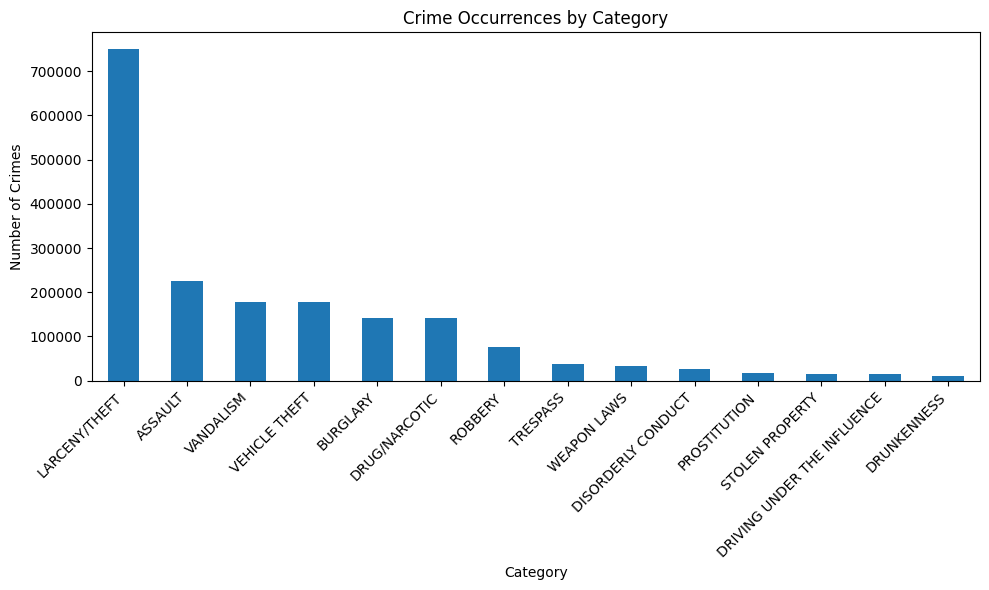

In [51]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')

# Add title and labels
plt.title('Crime Occurrences by Category')
plt.xlabel('Category')
plt.ylabel('Number of Crimes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Exercise 3: Temporal patterns.

- What is the year with most crimes?
- What is the year with the fewest crimes?.
- Create a barplot of crimes-per-year (years on the -axis, crime-counts on the -axis).

The year with the most crimes is 2018 with 124977 crimes.
The year with the fewest crimes is 2024 with 68564 crimes.


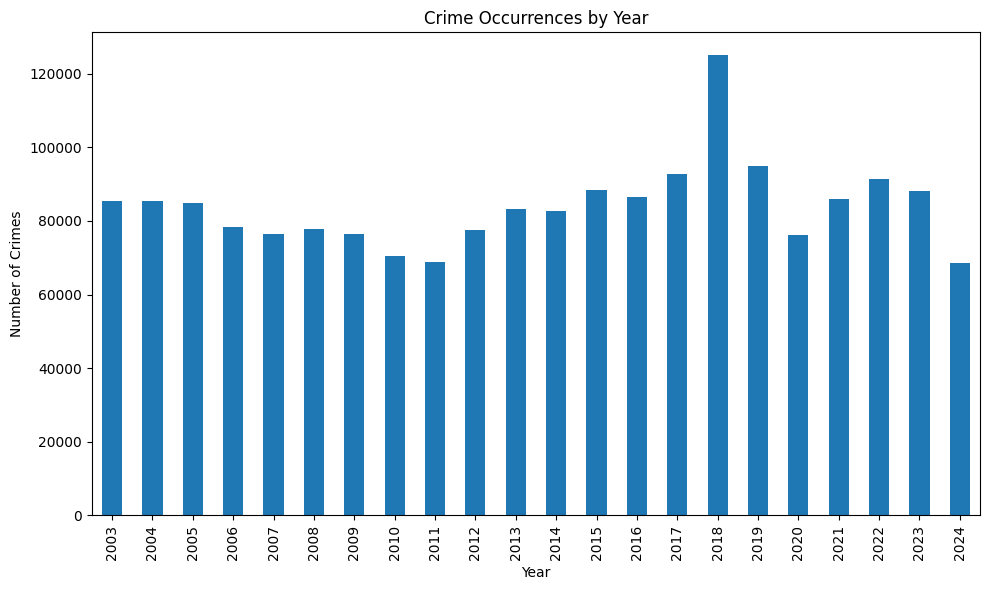

In [57]:
# Group by year and count the number of crimes
yearly_crime_counts = df_reindexed['Year'].value_counts()

# Find the year with the most crimes
year_most_crimes = yearly_crime_counts.idxmax()
most_crimes = yearly_crime_counts.max()

# Find the year with the fewest crimes
year_fewest_crimes = yearly_crime_counts.idxmin()
fewest_crimes = yearly_crime_counts.min()

print(f"The year with the most crimes is {year_most_crimes} with {most_crimes} crimes.")
print(f"The year with the fewest crimes is {year_fewest_crimes} with {fewest_crimes} crimes.")

# Group by year and count the number of crimes, then sort by year
yearly_crime_counts = df_reindexed['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
yearly_crime_counts.plot(kind='bar')

# Add title and labels
plt.title('Crime Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Show the plot
plt.tight_layout()
plt.show()

## Part 3: Some simple visualizations

With the cleaned, merged dataset we are now able to compute some simple visualizations.

In [53]:
csv_merged_path = os.path.join(data_path, "Police_Department_Incident_Reports_Complete.csv") 
df = pd.read_csv(csv_merged_path)

print("df merged shape:", df.shape)

df merged shape: (1845088, 9)


In [54]:
df.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,Year
0,LARCENY/THEFT,TARAVAL,-122.475834,37.743962,Tuesday,0,1,April,2003
1,VEHICLE THEFT,MISSION,-122.415322,37.754034,Tuesday,0,1,April,2003
2,ROBBERY,PARK,-122.441372,37.771619,Tuesday,0,1,April,2003
3,BURGLARY,MISSION,-122.421793,37.766610,Tuesday,0,1,April,2003
4,STOLEN PROPERTY,NORTHERN,-122.428130,37.781424,Tuesday,0,1,April,2003


In [55]:
print(df['Category'].value_counts())



Category
LARCENY/THEFT                  750329
ASSAULT                        224544
VANDALISM                      179031
VEHICLE THEFT                  176970
BURGLARY                       142362
DRUG/NARCOTIC                  142154
ROBBERY                         75126
TRESPASS                        38375
WEAPON LAWS                     32782
DISORDERLY CONDUCT              26092
PROSTITUTION                    17429
STOLEN PROPERTY                 15930
DRIVING UNDER THE INFLUENCE     14065
DRUNKENNESS                      9899
Name: count, dtype: int64


Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

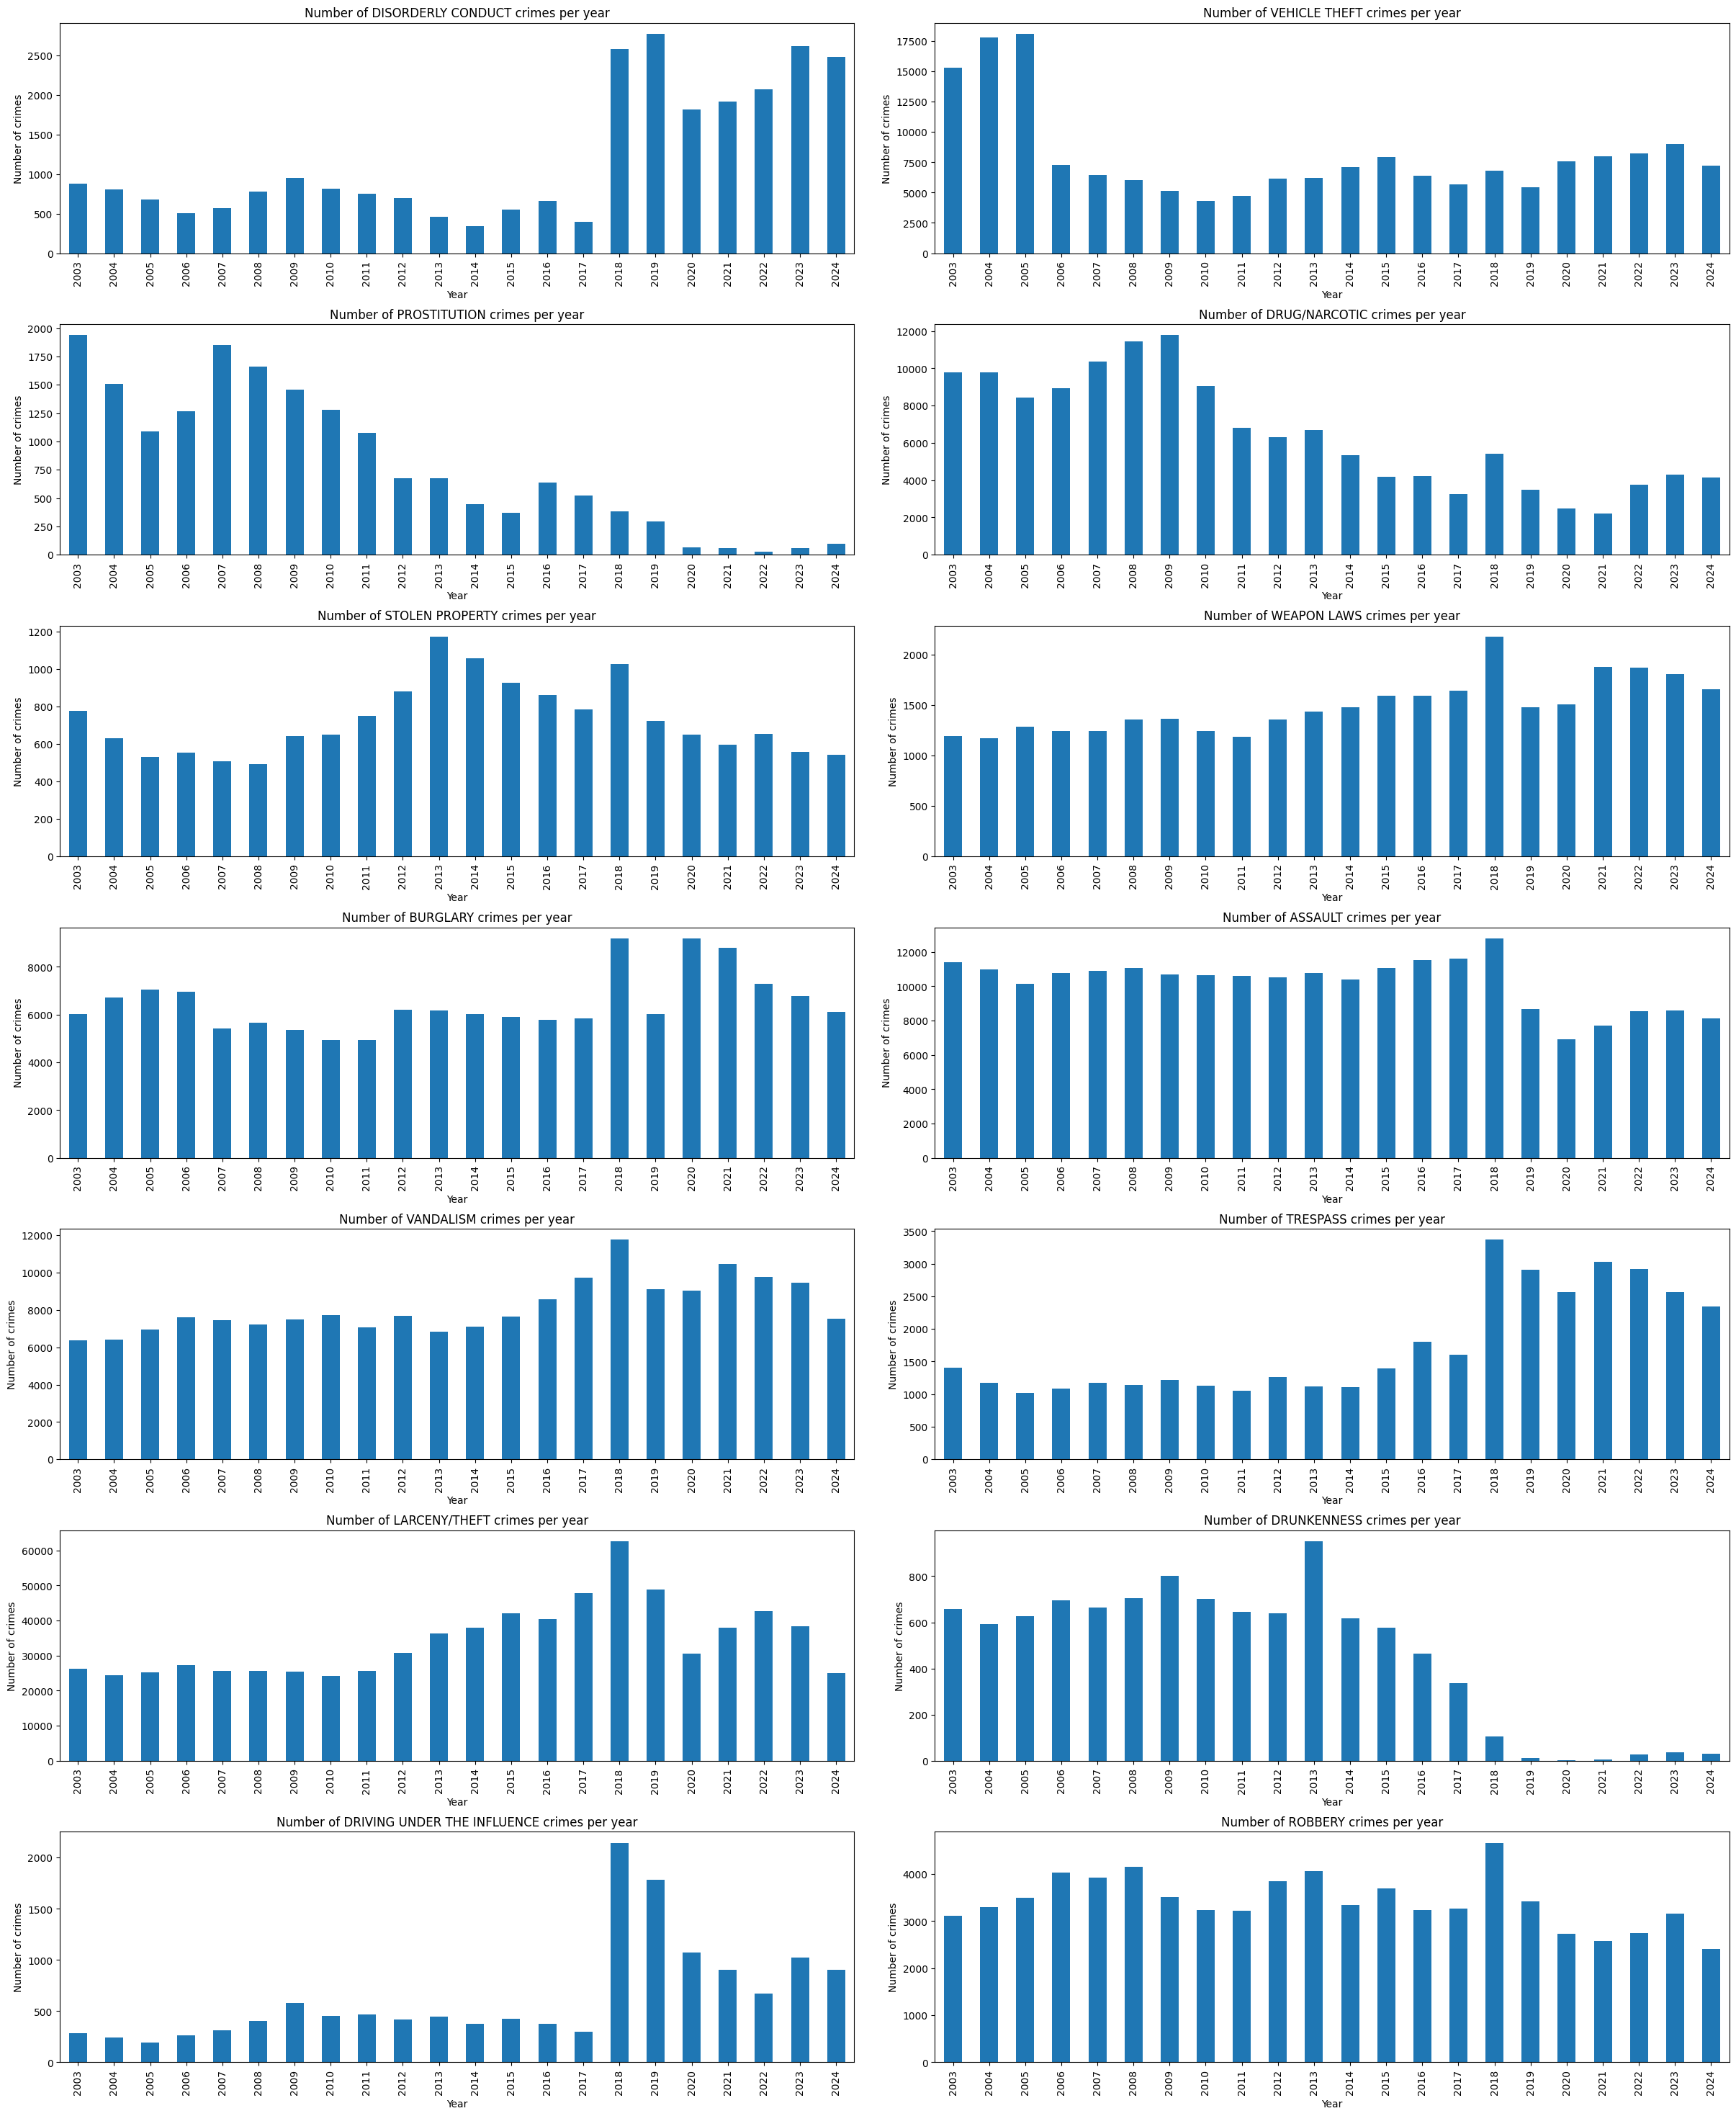

In [56]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

#Visualising yearly crimes:
import matplotlib.pyplot as plt
#For each focus crime, create bar chart of number of crimes per year sorted by year\n",

#Show as 2 subplots\n",
fig, axs = plt.subplots(7, 2, figsize=(25, 30))
fig.tight_layout(pad=5.0)  # Increase padding to avoid overlap
for i, crime in enumerate(focuscrimes):
    df[df['Category'] == crime]['Year'].value_counts().sort_index().plot(kind='bar', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Number of ' + crime + ' crimes per year')
    axs[i//2, i%2].set_ylabel('Number of crimes')
    axs[i//2, i%2].set_xlabel('Year')